## Link for the opensource Datasets used for the assignment :

1 World Health Organization : https://www.who.int/publications/m/item/who-ambient-air-quality-database-(update-jan-2024)

2 World Bank Group : https://data.worldbank.org/indicator/SP.DYN.LE00.IN

In [9]:
import pandas as pd

# Reading the uploaded files
air_quality_path = 'E:/who_ambient_air_quality_database_version_2024_(v6.1).xlsx'
life_expectancy_path = 'E:\API_SP.DYN.LE00.IN_DS2_en_csv_v2_87/API_SP.DYN.LE00.IN_DS2_en_csv_v2_87.csv'

# Load air quality data (assuming the sheet names or first few rows provide insights)
air_quality_data = pd.read_excel(air_quality_path, sheet_name=None)
air_quality_data.keys()  # This file contains multiple sheet names, we only need with the data

dict_keys(['Readme', 'Metadata', 'Update 2024 (V6.1)'])

In [10]:
# Loading the actual data from the relevant sheet "Update 2024 (V6.1)"
air_quality_actual = pd.read_excel(air_quality_path, sheet_name='Update 2024 (V6.1)')

# Display the first few rows to understand its structure
air_quality_actual.head()

,who_region,iso3,country_name,city,year,version,pm10_concentration,pm25_concentration,no2_concentration,pm10_tempcov,pm25_tempcov,no2_tempcov,type_of_stations,reference,web_link,population,population_source,latitude,longitude,who_ms
0,4_Eur,ESP,Spain,A Coruna/ESP,2013.0,"V4.0 (2018), V4.0 (2018), V4.0 (2018), V4.0 (2...",23.238,11.491,28.841,87.0,46.0,93.0,"Urban, Urban, Suburban",NaN,NaN,246146.0,"manual, manual, manual, manual",43.367900,-8.418571,1
1,4_Eur,ESP,Spain,A Coruna/ESP,2014.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023)",27.476,15.878,19.575,96.0,88.0,95.0,"Urban, Urban, Suburban",NaN,NaN,247604.0,NaN,43.368033,-8.418233,1
2,4_Eur,ESP,Spain,A Coruna/ESP,2015.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...",25.515,14.004,22.731,98.0,71.0,98.0,"Urban, Urban, Suburban, Suburban",NaN,NaN,247604.0,NaN,43.370375,-8.422900,1
3,4_Eur,ESP,Spain,A Coruna/ESP,2016.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...",23.057,13.160,20.204,98.0,98.0,98.0,"Urban, Urban, Suburban, Suburban",NaN,NaN,247604.0,NaN,43.370375,-8.422900,1
4,4_Eur,ESP,Spain,A Coruna/ESP,2017.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...",26.849,14.114,21.543,97.0,97.0,98.0,"Urban, Urban, Suburban, Suburban",NaN,NaN,247604.0,NaN,43.370375,-8.422900,1


In [11]:
# Load life expectancy data
life_expectancy_data = pd.read_csv(life_expectancy_path, skiprows=4)

life_expectancy_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,64.152000,64.537000,64.752000,65.132000,65.294000,65.50200,...,75.683000,75.617000,75.903000,76.072000,76.248000,75.723000,74.626000,74.992000,NaN,NaN
1,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,44.098835,44.401083,44.768037,44.925690,45.498933,45.51282,...,61.856856,62.444641,62.924810,63.367037,63.754752,63.309794,62.449093,62.888463,NaN,NaN
2,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.535000,33.068000,33.547000,34.016000,34.494000,34.95300,...,62.659000,63.136000,63.016000,63.081000,63.565000,62.575000,61.982000,62.879000,NaN,NaN
3,Africa Western and Central,AFW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.846145,38.165478,38.735788,39.063273,39.333621,39.61488,...,56.135275,56.518086,56.826634,57.129707,57.500295,57.180671,56.946475,57.589106,NaN,NaN
4,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,38.211000,37.267000,37.539000,37.824000,38.131000,38.49500,...,60.655000,61.092000,61.680000,62.144000,62.448000,62.261000,61.643000,61.929000,NaN,NaN


In [12]:
# Air Quality Data
air_quality_cleaned = air_quality_actual[['iso3', 'country_name', 'pm25_concentration']].groupby(['iso3', 'country_name']).mean().reset_index()

# Life Expectancy Data
life_expectancy_cleaned = life_expectancy_data[['Country Name', 'Country Code', '2021']]
life_expectancy_cleaned.rename(columns={'Country Name': 'country_name', 'Country Code': 'iso3', '2021': 'life_expectancy'}, inplace=True)

# Merging both datasets
merged_data = pd.merge(air_quality_cleaned, life_expectancy_cleaned, on='iso3', how='inner')

merged_data.head()

C:\Users\deven\AppData\Local\Temp\ipykernel_40076\1629729989.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  life_expectancy_cleaned.rename(columns={'Country Name': 'country_name', 'Country Code': 'iso3', '2021': 'life_expectancy'}, inplace=True)


,iso3,country_name_x,pm25_concentration,country_name_y,life_expectancy
0,AFG,Afghanistan,119.774000,Afghanistan,61.982
1,ALB,Albania,15.899857,Albania,76.463
2,AND,Andorra,NaN,Andorra,NaN
3,ARE,United Arab Emirates,38.707364,United Arab Emirates,78.710
4,ARG,Argentina,13.233625,Argentina,75.390


In [13]:
# Dropping rows with missing values in the relevant columns
merged_data_cleaned = merged_data.dropna(subset=['pm25_concentration', 'life_expectancy'])

merged_data_cleaned.head(10)

,iso3,country_name_x,pm25_concentration,country_name_y,life_expectancy
0,AFG,Afghanistan,119.774000,Afghanistan,61.982000
1,ALB,Albania,15.899857,Albania,76.463000
3,ARE,United Arab Emirates,38.707364,United Arab Emirates,78.710000
4,ARG,Argentina,13.233625,Argentina,75.390000
5,AUS,Australia,7.762084,Australia,83.300000
6,AUT,Austria,12.736245,Austria,81.190244
7,BEL,Belgium,12.621849,Belgium,81.790244
8,BEN,Benin,7.700000,Benin,59.821000
9,BGD,Bangladesh,77.247565,Bangladesh,72.381000
10,BGR,Bulgaria,19.906198,Bulgaria,71.463415


In [15]:
merged_data_cleaned['iso3'].unique()

array(['AFG', 'ALB', 'ARE', 'ARG', 'AUS', 'AUT', 'BEL', 'BEN', 'BGD',
       'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BRA', 'CAN', 'CHE', 'CHL',
       'CHN', 'CMR', 'COL', 'CRI', 'CUB', 'CYP', 'CZE', 'DEU', 'DNK',
       'DOM', 'DZA', 'ECU', 'ESP', 'EST', 'ETH', 'FIN', 'FJI', 'FRA',
       'GBR', 'GEO', 'GRC', 'GTM', 'HND', 'HRV', 'HUN', 'IDN', 'IND',
       'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN',
       'KAZ', 'KEN', 'KGZ', 'KHM', 'KOR', 'KWT', 'LAO', 'LBN', 'LKA',
       'LTU', 'LUX', 'LVA', 'MDG', 'MEX', 'MKD', 'MLT', 'MMR', 'MNE',
       'MNG', 'MYS', 'NGA', 'NLD', 'NOR', 'NPL', 'NZL', 'PAK', 'PAN',
       'PER', 'PHL', 'POL', 'PRI', 'PRT', 'PRY', 'QAT', 'ROU', 'RUS',
       'SAU', 'SEN', 'SGP', 'SLV', 'SRB', 'SVK', 'SVN', 'SWE', 'THA',
       'TJK', 'TKM', 'TTO', 'TUR', 'TZA', 'UGA', 'UKR', 'URY', 'USA',
       'UZB', 'VEN', 'VNM', 'ZAF'], dtype=object)

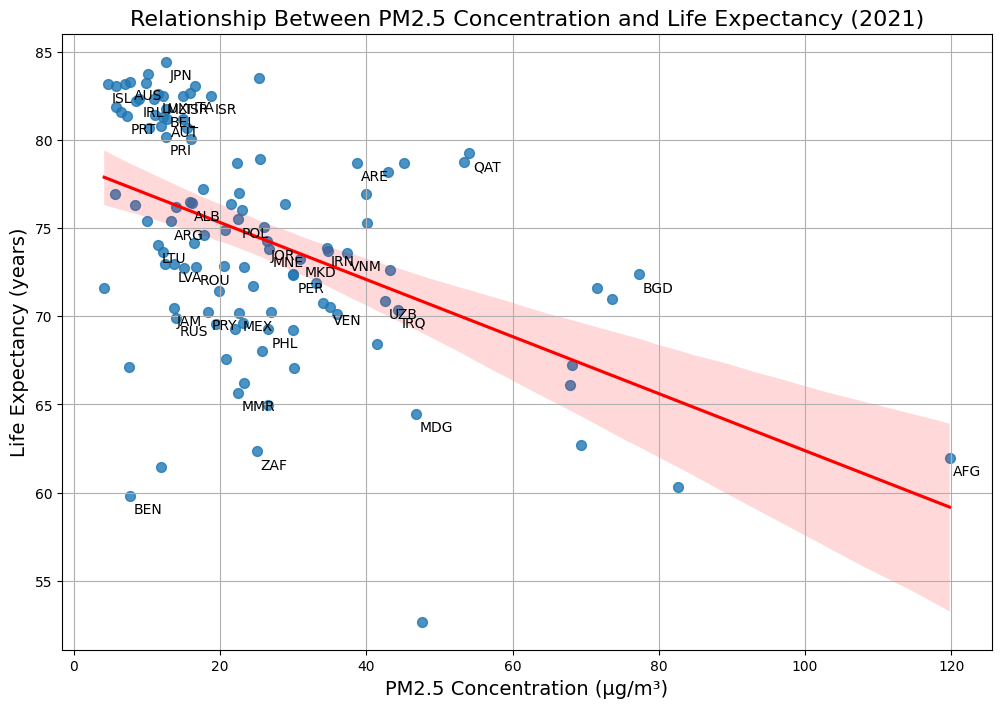

In [22]:
# Visualizing the correlation between PM2.5 concentration and life expectancy
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.regplot(
    x='pm25_concentration', 
    y='life_expectancy', 
    data=merged_data_cleaned, 
    scatter_kws={'s': 50}, 
    line_kws={'color': 'red'}
)


plt.title('Relationship Between PM2.5 Concentration and Life Expectancy (2021)', fontsize=16)
plt.xlabel('PM2.5 Concentration (µg/m³)', fontsize=14)
plt.ylabel('Life Expectancy (years)', fontsize=14)


for i, row in merged_data_cleaned.iterrows():
    if row['iso3'] in ['AFG', 'ALB', 'ARE', 'ARG', 'AUS', 'AUT', 'BEL', 'BEN', 'BGD',
       #'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BRA', 'CAN', 'CHE', 'CHL',
       #'CHN', 'CMR', 'COL', 'CRI', 'CUB', 'CYP', 'CZE', 'DEU', 'DNK',
       #'DOM', 'DZA', 'ECU', 'ESP', 'EST', 'ETH', 'FIN', 'FJI', 'FRA',
       #'GBR', 'GEO', 'GRC', 'GTM', 'HND', 'HRV', 'HUN', 'IDN', 'IND',
       'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN',
       #'KAZ', 'KEN', 'KGZ', 'KHM', 'KOR', 'KWT', 'LAO', 'LBN', 'LKA',
       'LTU', 'LUX', 'LVA', 'MDG', 'MEX', 'MKD', 'MLT', 'MMR', 'MNE',
       #'MNG', 'MYS', 'NGA', 'NLD', 'NOR', 'NPL', 'NZL', 'PAK', 'PAN',
       'PER', 'PHL', 'POL', 'PRI', 'PRT', 'PRY', 'QAT', 'ROU', 'RUS',
       #'SAU', 'SEN', 'SGP', 'SLV', 'SRB', 'SVK', 'SVN', 'SWE', 'THA',
       #'TJK', 'TKM', 'TTO', 'TUR', 'TZA', 'UGA', 'UKR', 'URY', 'USA',
       'UZB', 'VEN', 'VNM', 'ZAF']:
        plt.text(
            row['pm25_concentration'] + 0.5, 
            row['life_expectancy'] - 1, 
            row['iso3'], 
            fontsize=10
        )

plt.grid(True)
plt.show()

## NOTE Additional countries scatter plots are commented for visually appeal the audience, in case specific plots are required they can be commented out in the loop statement!